In [1]:
import os, sys

cwd = os.getcwd()
basedir = os.path.realpath(f"{cwd}/../")
sys.path.append(basedir)

In [ ]:
"""
Example of SAAS-based Bayesian Optimization on a 10D test function
where only 2 dimensions are relevant.
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from bayes_opt.saas_bo import SAASBayesianOptimization

# Define a 10-dimensional test function where only 2 dimensions are relevant
# This is a perfect test case for SAAS which should discover the important dimensions
def test_function(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10):
    """
    Test function for SAAS optimization.
    
    Only x1 and x2 are relevant, the rest are noise dimensions.
    This is a 10D version of the 2D function:
    f(x1, x2) = sin(x1) * cos(x2) - 0.5 * x1^2 - 0.5 * x2^2
    """
    # Only dimensions 1 and 2 are relevant
    return np.sin(x1) * np.cos(x2) - 0.5 * x1**2 - 0.5 * x2**2


def plot_optimization_results(optimizer, true_dims=[0, 1], resolution=100):
    """Plot the optimization results, focusing on the true relevant dimensions."""
    # Extract results
    results = optimizer.res()
    
    # Extract parameter values for the true dimensions
    x1_values = np.array([res['params'][f'x{true_dims[0]+1}'] for res in results])
    x2_values = np.array([res['params'][f'x{true_dims[1]+1}'] for res in results])
    values = np.array([res['target'] for res in results])
    
    # Setup for plotting the true function (in the 2 relevant dimensions)
    x1_range = np.linspace(0, 1, resolution)
    x2_range = np.linspace(0, 1, resolution)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    
    # Initialize other dimensions to their middle values (0.5)
    input_args = [0.5] * 10  # Default all dimensions to 0.5
    
    # Calculate function values across the grid
    Z = np.zeros((resolution, resolution))
    for i in range(resolution):
        for j in range(resolution):
            # Set relevant dimensions to current grid values
            input_args[true_dims[0]] = X1[i, j]
            input_args[true_dims[1]] = X2[i, j]
            Z[i, j] = test_function(*input_args)
    
    # Create the plot
    fig = plt.figure(figsize=(18, 6))
    
    # Plot 1: 3D surface of true function
    ax1 = fig.add_subplot(131, projection='3d')
    surf = ax1.plot_surface(X1, X2, Z, cmap=cm.viridis, alpha=0.7, linewidth=0)
    ax1.set_xlabel(f'x{true_dims[0]+1}')
    ax1.set_ylabel(f'x{true_dims[1]+1}')
    ax1.set_title('True Function')
    fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)
    
    # Plot 2: Contour plot with sampled points
    ax2 = fig.add_subplot(132)
    contour = ax2.contourf(X1, X2, Z, cmap=cm.viridis, levels=20)
    scatter = ax2.scatter(x1_values, x2_values, 
                         c=values, cmap=cm.viridis, 
                         edgecolors='k', s=50, zorder=10)
    ax2.set_xlabel(f'x{true_dims[0]+1}')
    ax2.set_ylabel(f'x{true_dims[1]+1}')
    ax2.set_title('Sampled Points')
    fig.colorbar(contour, ax=ax2, shrink=0.5, aspect=5)
    
    # Plot 3: Convergence of optimization
    ax3 = fig.add_subplot(133)
    best_values = np.maximum.accumulate(values)
    iterations = np.arange(1, len(values) + 1)
    ax3.plot(iterations, best_values)
    ax3.set_xlabel('Iterations')
    ax3.set_ylabel('Best Function Value')
    ax3.set_title('Convergence')
    
    plt.tight_layout()
    plt.savefig('saas_optimization_results.png')
    print("Plot saved as 'saas_optimization_results.png'")
    plt.show()


def main():
    """Run SAAS-based Bayesian Optimization on a 10D test function."""
    # Define parameter bounds
    pbounds = {
        'x1': (0, 1),
        'x2': (0, 1),
        'x3': (0, 1),
        'x4': (0, 1),
        'x5': (0, 1),
        'x6': (0, 1),
        'x7': (0, 1),
        'x8': (0, 1),
        'x9': (0, 1),
        'x10': (0, 1),
    }
    
    # Create optimizer
    print("Initializing SAAS Bayesian Optimization...")
    optimizer = SAASBayesianOptimization(
        f=test_function,
        pbounds=pbounds,
        alpha=0.1,             # SAAS sparsity parameter
        num_warmup=128,        # Reduced for demo purposes
        num_samples=64,        # Reduced for demo purposes
        thinning=4,            # Thinning to reduce computation
        random_state=42,
        verbose=1
    )
    
    # Run optimization
    print("\nStarting optimization...")
    optimizer.maximize(
        init_points=5,
        n_iter=15
    )
    
    # Print results
    print("\nResults:")
    print(f"Best target: {optimizer.max['target']:.4f}")
    print(f"Best parameters: {optimizer.max['params']}")
    
    # Plot results
    plot_optimization_results(optimizer)
    
    print("\nOptimization complete!")


main()

1/0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from bayes_opt.saas_bo import SAASBayesianOptimization

# Define a 10-dimensional test function where only 2 dimensions are relevant
# This is a perfect test case for SAAS which should discover the important dimensions
def test_function(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10):
    """
    Test function for SAAS optimization.
    
    Only x1 and x2 are relevant, the rest are noise dimensions.
    This is a 10D version of the 2D function:
    f(x1, x2) = sin(x1) * cos(x2) - 0.5 * x1^2 - 0.5 * x2^2
    """
    # Only dimensions 1 and 2 are relevant
    return np.sin(x1) * np.cos(x2) - 0.5 * x1**2 - 0.5 * x2**2


def plot_optimization_results(optimizer, true_dims=[0, 1], resolution=100):
    """Plot the optimization results, focusing on the true relevant dimensions."""
    # Extract results
    params = np.array([res['params'] for res in optimizer.res])
    values = np.array([res['target'] for res in optimizer.res])
    
    # Setup for plotting the true function (in the 2 relevant dimensions)
    x1_range = np.linspace(0, 1, resolution)
    x2_range = np.linspace(0, 1, resolution)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    
    # Initialize other dimensions to their middle values (0.5)
    dims = np.ones((resolution, resolution, 10)) * 0.5
    dims[:,:,true_dims[0]] = X1
    dims[:,:,true_dims[1]] = X2
    
    # Calculate function values across the grid
    Z = np.zeros((resolution, resolution))
    for i in range(resolution):
        for j in range(resolution):
            x = dims[i,j]
            Z[i,j] = test_function(*x)
    
    # Create the plot
    fig = plt.figure(figsize=(18, 6))
    
    # Plot 1: 3D surface of true function
    ax1 = fig.add_subplot(131, projection='3d')
    surf = ax1.plot_surface(X1, X2, Z, cmap=cm.viridis, alpha=0.7, linewidth=0)
    ax1.set_xlabel(f'x{true_dims[0]+1}')
    ax1.set_ylabel(f'x{true_dims[1]+1}')
    ax1.set_title('True Function')
    fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)
    
    # Plot 2: Contour plot with sampled points
    ax2 = fig.add_subplot(132)
    contour = ax2.contourf(X1, X2, Z, cmap=cm.viridis, levels=20)
    scatter = ax2.scatter(params[:,true_dims[0]], params[:,true_dims[1]], 
                         c=values, cmap=cm.viridis, 
                         edgecolors='k', s=50, zorder=10)
    ax2.set_xlabel(f'x{true_dims[0]+1}')
    ax2.set_ylabel(f'x{true_dims[1]+1}')
    ax2.set_title('Sampled Points')
    fig.colorbar(contour, ax=ax2, shrink=0.5, aspect=5)
    
    # Plot 3: Convergence of optimization
    ax3 = fig.add_subplot(133)
    best_values = np.maximum.accumulate(values)
    iterations = np.arange(1, len(values) + 1)
    ax3.plot(iterations, best_values)
    ax3.set_xlabel('Iterations')
    ax3.set_ylabel('Best Function Value')
    ax3.set_title('Convergence')
    
    plt.tight_layout()
    plt.savefig('saas_optimization_results.png')
    print("Plot saved as 'saas_optimization_results.png'")
    plt.show()


def main():
    """Run SAAS-based Bayesian Optimization on a 10D test function."""
    # Define parameter bounds
    pbounds = {
        'x1': (0, 1),
        'x2': (0, 1),
        'x3': (0, 1),
        'x4': (0, 1),
        'x5': (0, 1),
        'x6': (0, 1),
        'x7': (0, 1),
        'x8': (0, 1),
        'x9': (0, 1),
        'x10': (0, 1),
    }
    
    # Create optimizer
    print("Initializing SAAS Bayesian Optimization...")
    optimizer = SAASBayesianOptimization(
        f=test_function,
        pbounds=pbounds,
        alpha=0.1,             # SAAS sparsity parameter
        num_warmup=128,        # Reduced for demo purposes
        num_samples=64,        # Reduced for demo purposes
        thinning=4,            # Thinning to reduce computation
        random_state=42,
        verbose=1
    )
    
    # Run optimization
    print("\nStarting optimization...")
    optimizer.maximize(
        init_points=5,
        n_iter=15
    )
    
    # Print results
    print("\nResults:")
    print(f"Best target: {optimizer.max['target']:.4f}")
    print(f"Best parameters: {optimizer.max['params']}")
    
    # Plot results
    plot_optimization_results(optimizer)
    
    print("\nOptimization complete!")

Initializing SAAS Bayesian Optimization...

Starting optimization...
TRACE - SAASBayesianOptimization._fit_gp: Entry point
TRACE - SAASBayesianOptimization._fit_gp: Space has 5 points
TRACE - SAASBayesianOptimization._fit_gp: X shape=(5, 10), y shape=(5,)
TRACE - SAASBayesianOptimization._fit_gp: Points at last fit = 0
TRACE - SAASBayesianOptimization._fit_gp: GP model not yet initialized
TRACE - SAASBayesianOptimization._fit_gp: Calling gp.fit() with X:(5, 10), y:(5,)
TRACE - SAASGP.fit: Input shapes - X_train: (5, 10), Y_train: (5,)
TRACE - SAASGP.fit: After copying - X_train_: (5, 10), Y_train: (5,)
TRACE - SAASGP.fit: Set Ls to None to force recomputation on next prediction
TRACE - SAASBayesianOptimization._fit_gp: GP fit successful, _n_points_at_last_fit = 5
DEBUG - SAASExpectedImprovement.__call__: X shape=(10000, 10), y_best=0.3963109537081227
TRACE - SAASExpectedImprovement.__call__: GP state - X_train_: (5, 10), Y_train: (5,)
TRACE - SAASExpectedImprovement.__call__: GP Ls: No

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

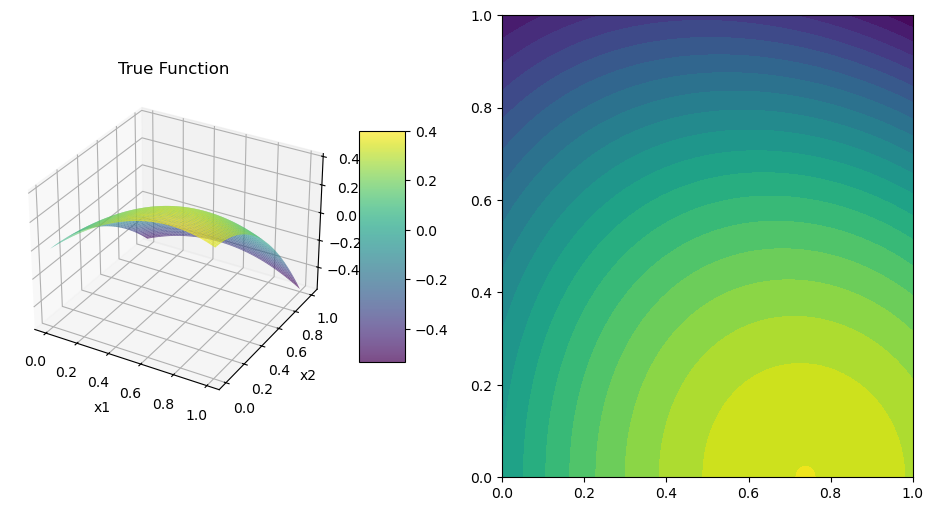

In [3]:
main()